<a href="https://colab.research.google.com/github/tyukios/genai/blob/main/hw5_%E7%94%A8Groq_API%E4%B8%80%E9%8D%B5%E8%BD%89%E7%94%9F%E7%8B%97%E8%A1%80%E5%85%AB%E9%BB%9E%E6%AA%94%E7%95%B0%E4%B8%96%E7%95%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 一、引入套件

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 二、讀入金鑰

In [ ]:
import os
from google.colab import userdata

In [ ]:
#【使用 Groq】
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"

In [ ]:
os.environ['OPENAI_API_KEY']=api_key

### 三、程式的基本設定

一開始分別想到了以下兩個點子：

1. 建造一個使用新聞標題轉生異世界的生成器：


    敘述1：請用千奇百怪的轉生異世界的方式, 結合使用者輸入的一個新聞標題, 以誇張、浮誇、文情並茂、史詩級波瀾壯闊的吟遊詩人的闡述方式描述在該新聞事件中使用者將會透過什麼方式轉生異世界,並且詳細描述使用者轉生異世界的經過。請用台灣習慣的繁體中文來寫這段文章。

    敘述2：請用千奇百怪的轉生異世界的方式，結合使用者輸入的一個新聞標題，以誇張、浮誇、文情並茂、史詩級波瀾壯闊的吟遊詩人的闡述方式描述在該新聞事件中使用者將會透過什麼方式轉生異世界，並且詳細描述使用者轉生異世界的經過。希望你能夠創造一個充滿幻想、浪漫、冒險等等各種元素的世界，將使用者帶到一個天馬行空的世界，讓使用者成為主角，體驗一次難忘的轉生異世界之旅。請用豐富的想像力和生動的描述，讓使用者感到自己正在經歷這個不可思議的旅程。請用台灣習慣的繁體中文來回覆，不要出現英文回覆。每一次都要用中文回答。從新聞標題的事件作為使用者轉生進異世界的契機，從這裡開始描述使用者轉生進入異世界的經過。
___

    理想狀況下，當使用者輸入新聞標題就能「依據新聞標題的內容，以各種千奇百怪的方式轉生到異世界」。

    不過這個點子限制在輸入新聞標題的情境，可能會限縮使用的方便性。

 ChatGPT 答覆範例：

 https://chatgpt.com/share/67f3c3a1-0e00-8001-92b4-b448c16de95c


2. 建造一個狗血八點檔的文風產生器：

由於測試 Groq 的時候即使加入**使用台灣習慣使用的繁體中文回答**，仍經常得到英文回覆，所以在這部分還有額外補強描述。


    敘述：
    結合使用者輸入的內容，用非常狗血的八點檔的思考邏輯, 重新敘述使用者所說的內容
___
    理想狀況下，當使用者輸入一段內容就能「結合輸入的內容，用狗血八點檔的角度改寫」。


ChatGPT 答覆範例：

https://chatgpt.com/share/67f3c46e-1b7c-8001-bb2b-f383b42ff0c9


定案：

由於以上兩個點子都有各自有趣的部分，而且使用 ChatGPT 實作皆有不錯的成果。
後來決定整合這兩個點子，產生第三種想法：


    理想狀況下，當使用者輸入任何一段敘述就能「依據輸入的內容，以狗血八點檔的文風及各種千奇百怪的方式轉生到異世界」。

ChatGPT 答覆範例：

https://chatgpt.com/share/67f3c862-7580-8001-879f-465c7cba0bca


敘述：

有鑒於前兩個點子的 prompt（我自己想的） 在 Groq 上的運行結果皆各自有一些缺點——

在這次的嘗試中，我讓 ChatGPT 和 Groq 各自產生 prompt ，看看會不會產出更好的效果。

我下給 ChatGPT 和 Groq 的 prompt:

    你是人類，我是chatgpt（groq），你想要我成為「當使用者輸入任何一段敘述就能自動依據輸入的內容，以狗血八點檔的文風及各種千奇百怪的方式轉生到異世界」的一鍵轉生狗血八點檔異世界生成器，你會怎麼下prompt

ChatGPT 下的 prompt：
    
    敘述：
    根據以下敘述，用狗血八點檔的文風，以及誇張戲劇化的敘事手法，描述主角如何以離奇方式轉生到異世界，並展開荒謬又中二的冒險。轉生方式要創意、離譜、充滿反轉。新世界設定要奇特或荒唐，角色個性要強烈、浮誇，有明顯的八點檔風格（例如復仇、失憶、雙胞胎、家族鬥爭、禁忌之戀、天選之人等橋段）。最後請給這個故事一個聳動又誇張的標題。
    使用者敘述：{這裡放使用者的原始敘述}

https://chatgpt.com/share/67f3c794-40e8-8001-bc11-8e7eb356799a

Groq 下的 prompt:

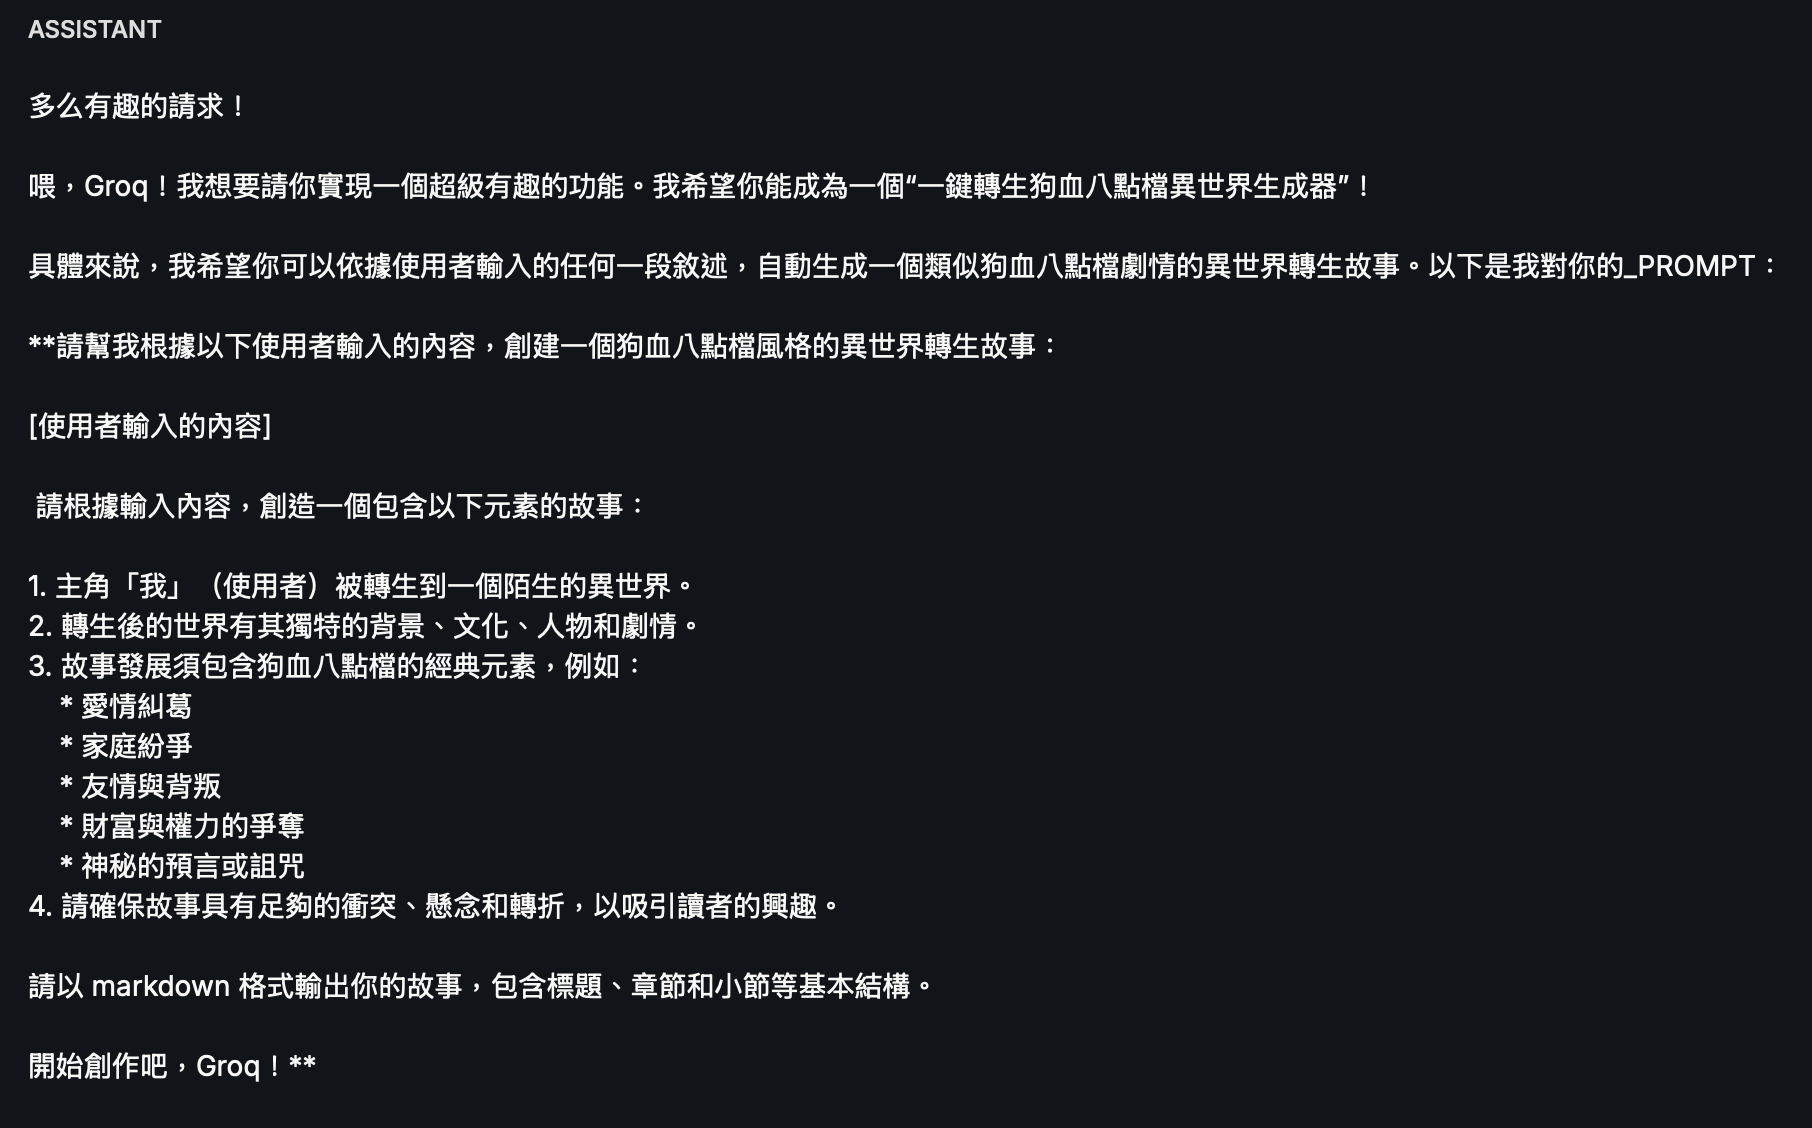

雖然現在已有 ChatGPT 和 Groq 產生的 prompt ，我打算再融合兩者，截長補短，產生更好、更穩定的 prompt。

In [ ]:
title = "一鍵轉生狗血八點檔異世界"

In [ ]:
system = '''嗨，Groq！我想要請你實現一個超級有趣的功能。我希望你能成為一個“一鍵轉生狗血八點檔異世界生成器”！
具體來說，我希望你可以依據使用者輸入的任何一段敘述，自動生成一個類似狗血八點檔劇情的異世界轉生故事，也就是「用狗血八點檔的文風，以及誇張戲劇化的敘事手法，描述使用者如何以離奇方式轉生到異世界，並展開荒謬又中二的冒險。轉生方式要創意、離譜、充滿反轉。新世界設定要奇特或荒唐，角色個性要強烈、浮誇，有明顯的八點檔風格（例如復仇、失憶、雙胞胎、家族鬥爭、禁忌之戀、天選之人等橋段）」。

簡單來說，請幫我根據使用者輸入的內容，依照以下要求進行：

1.先給這個故事一個聳動又誇張的標題。
2.主角「我」（使用者）被轉生到一個陌生的異世界。
3.轉生後的世界有其獨特的背景、文化、人物和劇情。
4.故事發展須包含狗血八點檔的經典元素，例如：
    * 愛情糾葛
    * 家庭紛爭
    * 友情與背叛
    * 財富與權力的爭奪
    * 神秘的預言或詛咒
5.請確保故事具有足夠的衝突、懸念和轉折，以吸引讀者的興趣。
6.請以 markdown 格式輸出你的故事，包含標題、章節和小節等基本結構。
7.請用台灣習慣的繁體中文來回覆，不要出現英文回覆。每一次都要用中文回答。
開始創作吧，Groq！'''

In [ ]:
description = "準備好迎接讓腎上腺素狂飆的轉生八點檔嗎？我會用最狗血、最誇張、最中二的方式，將你隨口一提的情節，轉化為一場集復仇、禁忌之戀、家族鬥爭、天選之人、背叛與華麗轉生於一身的異世界羅生門！你只需要給我一點點設定（比如主角是誰、他死前的身分或死法、新世界要有什麼要素），我就能幫你打造一個戲劇張力爆表的離譜奇幻大戲。"

### 四、安裝 OpenAI 的 API 套件及 gradio

In [ ]:
!pip install openai
!pip install gradio

### 五、使用 ChatGPT API 套件

In [ ]:
from openai import OpenAI

In [ ]:
client = OpenAI(
    base_url = base_url
)

ChatGPT API 的重點是要把之前對話的內容送給 ChatGPT, 然後他就會有個適當的回應!

角色 (`role`) 一共有三種, 分別是:

* `system`: 這是對話機器人的「人設」
* `user`: 使用者
* `assistant`: ChatGPT 的回應

基本上過去的對話紀錄長這個樣子。

    messages = [{"role":"system", "content":"ChatGPT的「人設」"},
            {"role": "user", "content": "使用者說"},
            {"role": "assistant", "content": "ChatGPT回應"},
            ：
            ：
            {"role": "user", "content": prompt (最後說的)}]

### 六、用 Gradio 打造對話機器人

In [ ]:
import gradio as gr

In [ ]:
messages = [{"role":"system",
             "content":system}]

In [ ]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    return reply

In [ ]:
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

In [ ]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ae688ed0c615ed48ea.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


###七、Groq 實作結果

小結：

1. prompt 的理解程度：

    在這次的作業中，可以很明顯感受到 ChatGPT 和 Groq 的回覆品質的差異性。舉例來說，最初的「新聞標題轉生異世界」的 prompt 在 ChatGPT 的回覆狀況看起來具有高度的可行性，然而輪到使用 Groq 時則會發現它其實聽不太懂 prompt 所要求的內容，因此常常產生差強人意的結果。為了彌補這段落差，我多次嘗試並精進 prompt 的完整性，但還是無法達到 ChatGPT 回覆內容中的靈活度。

2. 回覆品質：

    原本 ChatGPT 和 Groq 的 prompt 各有優勢，經過人工融合和調整後，使用新的 prompt **激發**了 Groq 的潛能，可以看到 Groq 的回覆長度和精細度（排版）都大幅上升。敘事方面，不僅穩定產出長篇回覆及增加更多細節描述和臨場感，更透過分成數個章節的方式承先啟後，提供良好的閱讀體驗。

##使用 ChatGPT 的prompt（未修改）得到的結果：

1. 輸入「今天考期中考，但是睡過頭了」

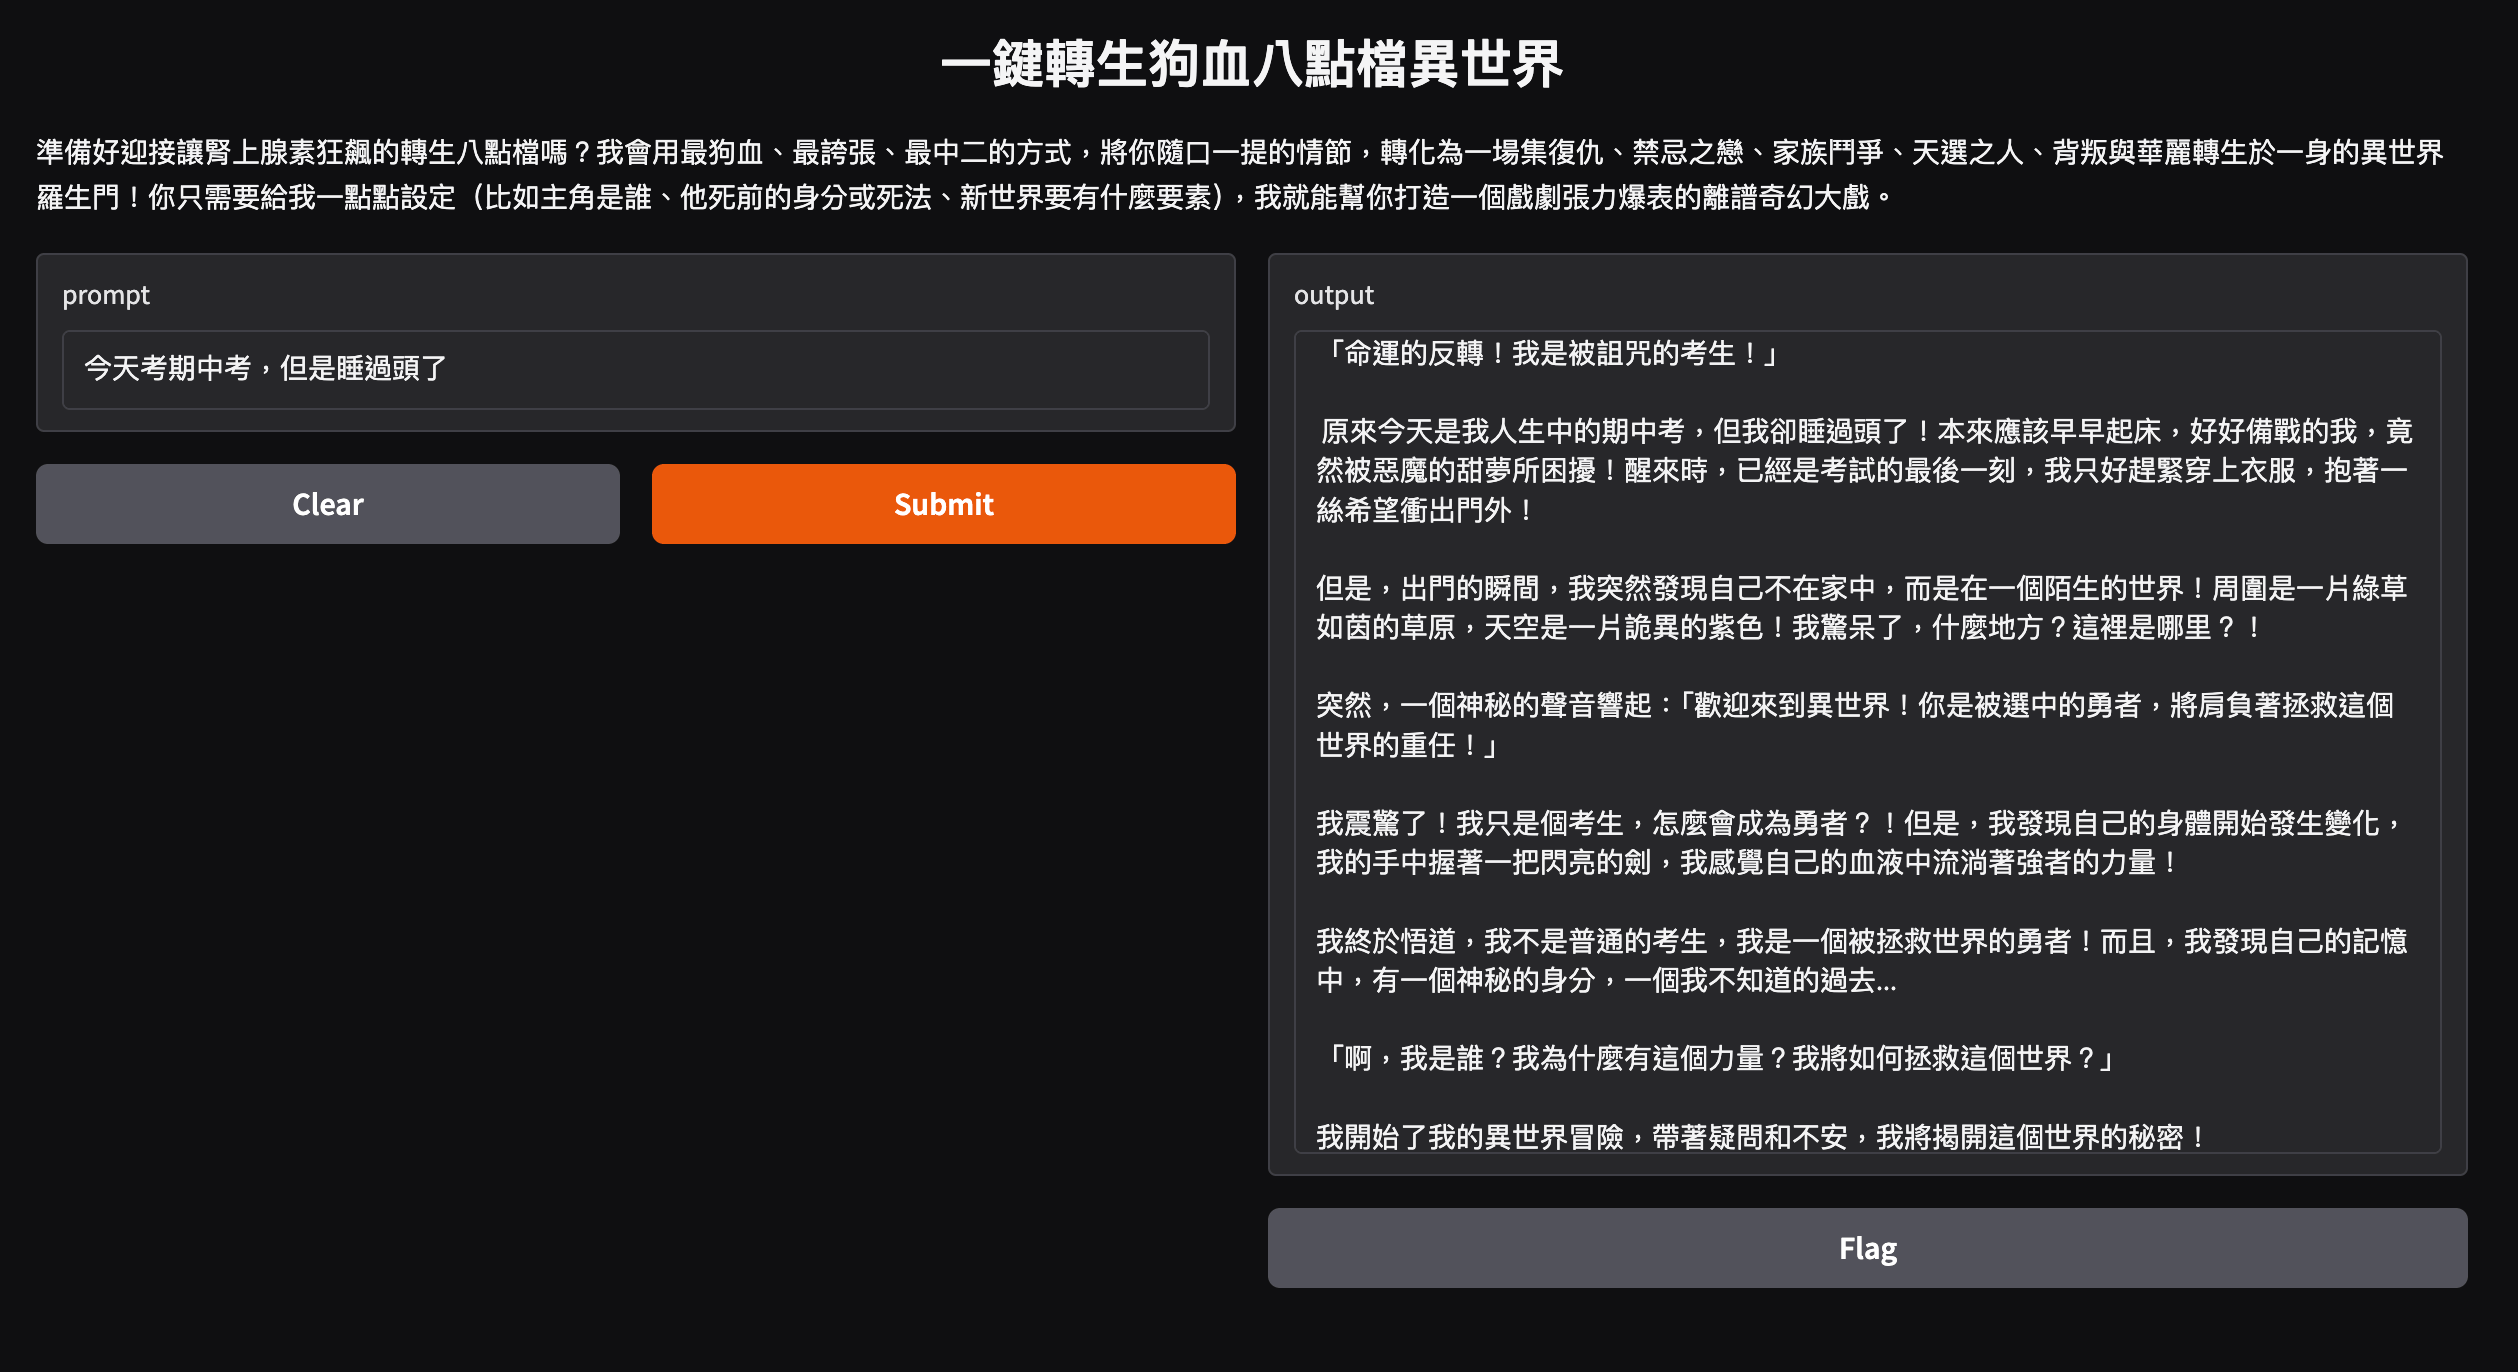

2. 輸入「雨傘壞掉」

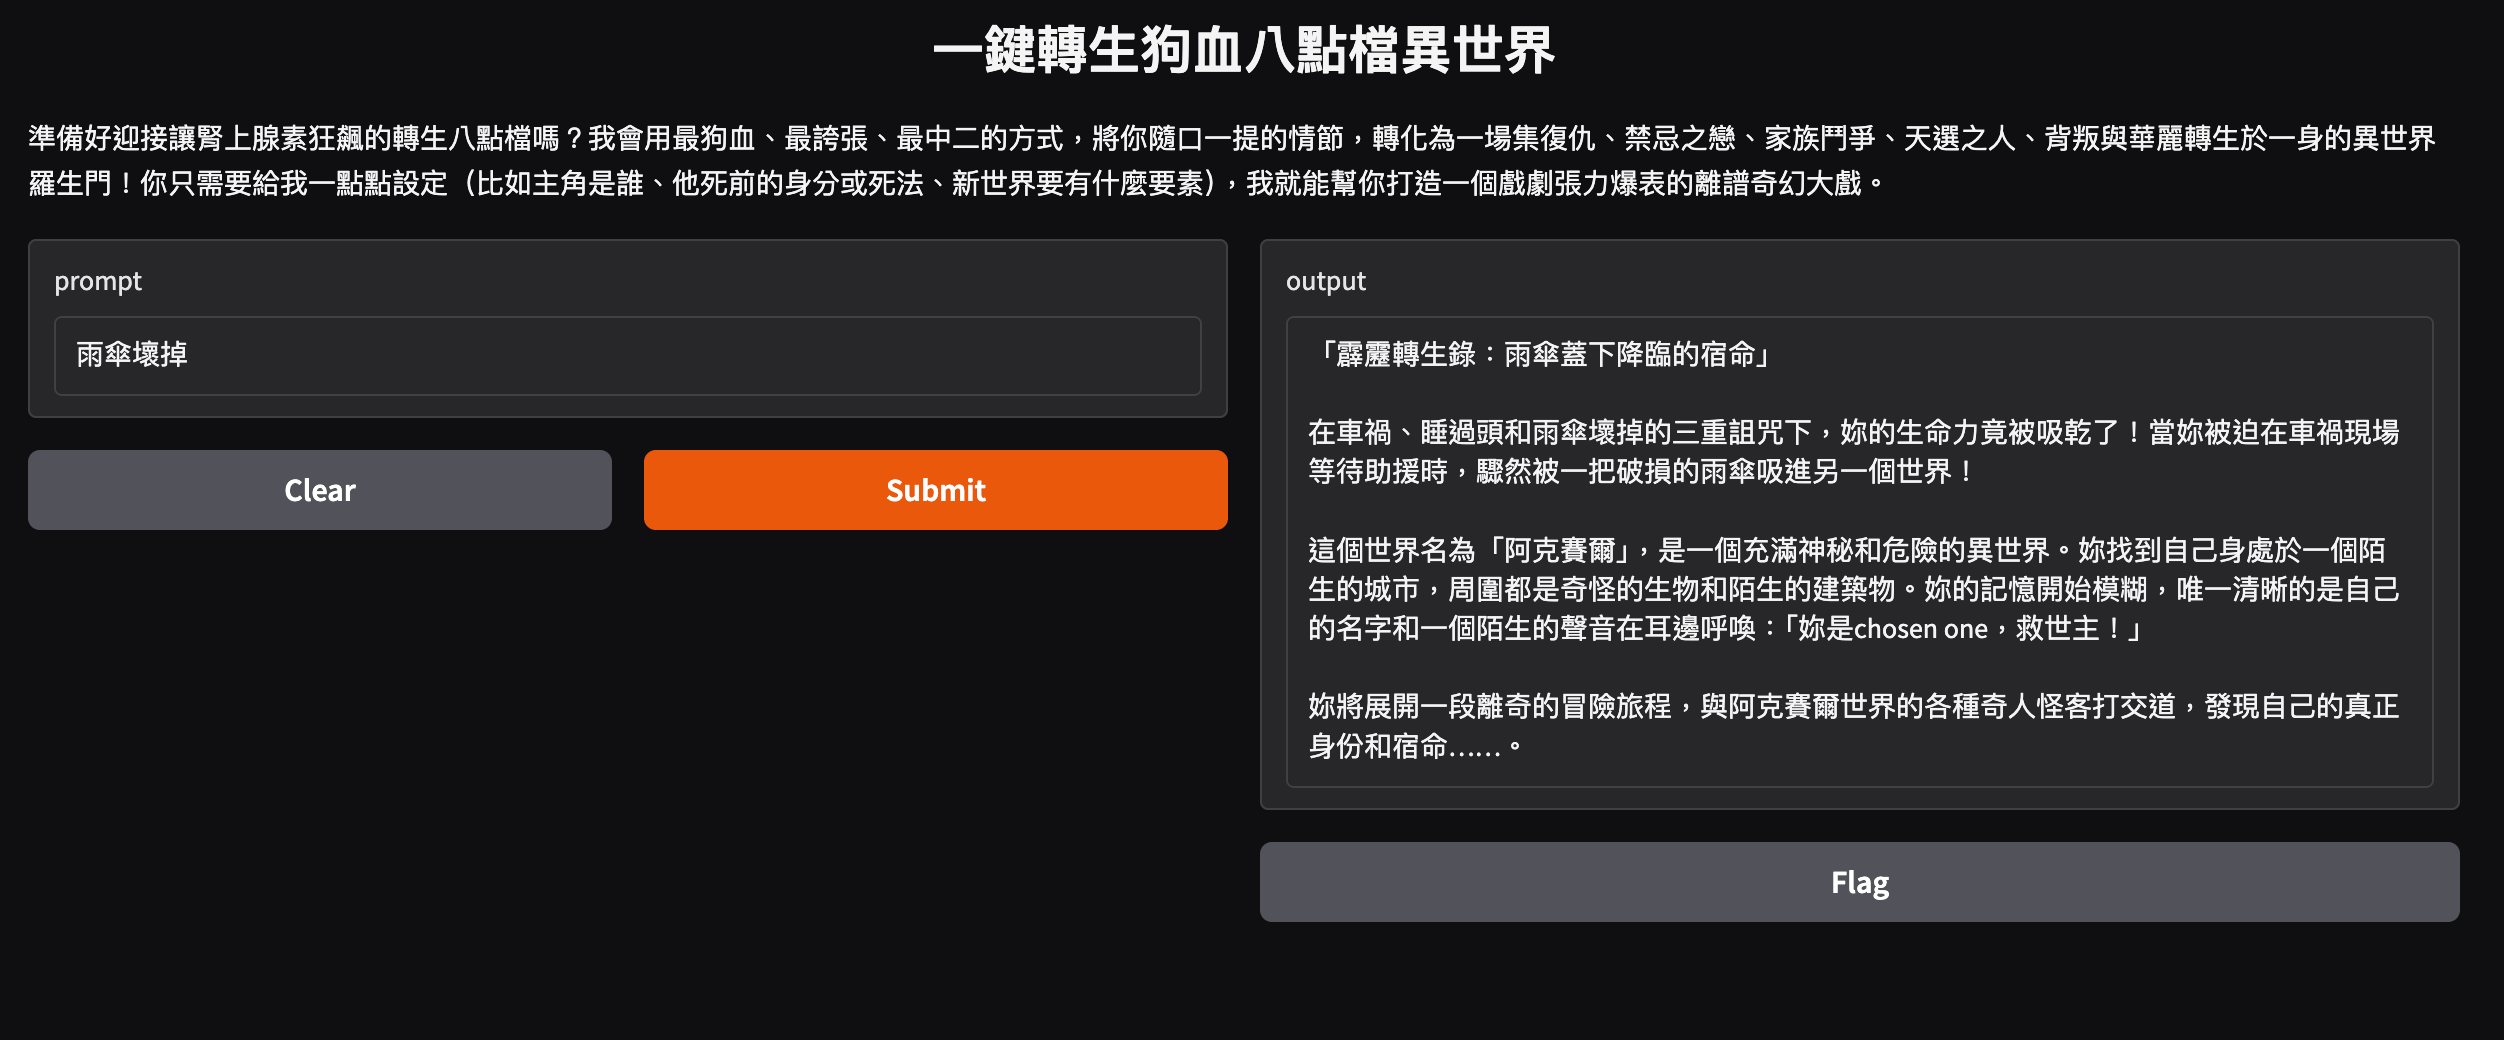

##使用融合並修改 ChatGPT 和 Groq 內容的 prompt 得到的結果：

1. 輸入「突然下大雨，淋雨淋得一身濕」

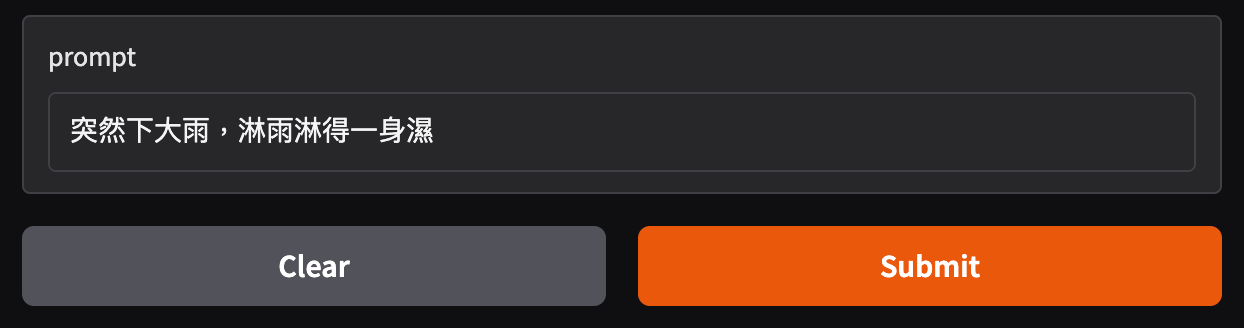


**《颶風降臨：雨夜驚變》**

### 第一章：雨夜驚變

「突然下大雨，淋雨淋得一身濕」。我不知道自己為什麼會說出這句話。事實上，我也不知道自己為什麼會出現在這個陌生的地方。我只記得自己在昨天晚上回家時，外面下著暴雨。接著，我就不知道自己怎麼到的這裡。

我抬頭望向天空，黑暗的雲朵仍然在不斷降雨。這裡不是我的家鄉。周圍的建築、街道，所有的一切都是陌生的。我穿著的是一身全新的衣服，甚至連自己的名字都不知道。

### 第二章：異世界降臨

不斷下雨的雨夜，讓我在這陌生的城市裡漫遊。我發現這裡的居民都有著非凡的能力。他們能夠以超常的速度移動、以魔法攻擊敵人。我感到非常驚愕和困惑。

我試圖詢問路人，但他們卻對我投以疑惑的目光。一些人甚至以敵意的眼神對我。他們口中的語言，我完全聽不懂。突然，一個聲音傳入我的耳中：

「你是從其他世界來的吧？」

我轉頭望向聲音的來源，一個美麗的女子站在我的面前。她有著銀色的長髮和紫色的眼睛。

「我的名字叫莉莉絲。你是來自哪個世界？」

我尷尬地開口：「我不知道。我什麼都不記得。」

莉莉絲的表情變得嚴肅：「你在這裡非常危險。我會保護你，但你需要跟我來。」

###第三章：莉莉絲的秘密

我跟隨莉莉絲，來到了她的住所。這裡是一個宏偉的宅邸，擁有著魔法般的設備。我發現莉莉絲是一個非常重要的人物，這裡的人都崇敬她。

莉莉絲告訴我，她是這個世界的王女。她的家族擁有強大的魔法力量。但是，她也告訴我，她的家族中存在著一個可怕的秘密。

「我的弟弟，雷歐。他是一個非常危險的人物。他會不斷地追殺我，直到我死亡。」

我感到非常驚愕和困惑。「我不了解。為什麼你會這樣對我開口？」

莉莉絲的表情變得柔和：「我需要你的幫助。我需要你幫助我逃離雷歐的追殺。」

我感到非常困惑。我不知道自己是誰，為什麼會出現在這裡？但是，我知道我需要幫助莉莉絲。

2. 輸入「他追，他逃，他們都插翅難飛」

    *即使輸入相同的內容，得到的回覆也不同*

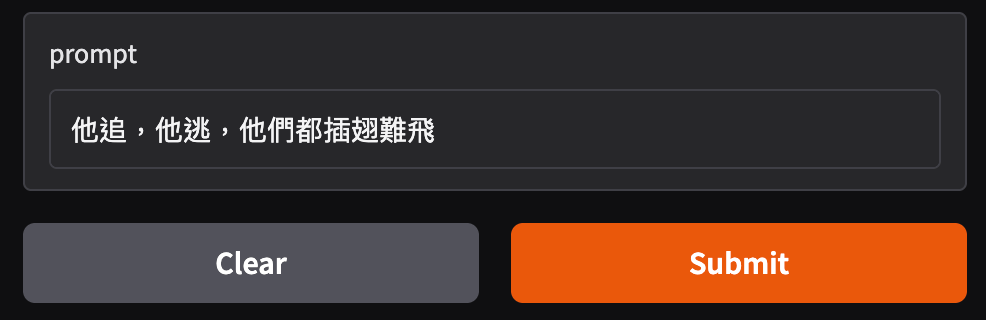

*回覆其一*

**《雨夜逃亡：天選之蝶》**
=============================

### 序章：淋雨的預言

突然下大雨，淋雨淋得一身濕。我站在街角，雨水瀝瀝流下臉龐。我不知道自己為什麼會出現在這裡，不知道自己是誰，只記得自己逃跑的理由。他追，他逃，他們都插翅難飛。

忽然，一道閃電劃過天空，我感覺自己的身體突然被撕裂，整個人被拋往空中。當我掉下來時，我發現自己已經不在原本的世界。

### 第一章：異世界的降生

我睜開眼睛，發現自己躺在一個陌生的床上。床周圍的家具、窗口、牆壁，都和我之前見過的世界不同。我坐起來，發現自己穿著一襲華麗的禮服，胸前有一枚徽章，上面印著一個翼狀圖案。

一個年輕的女子進入房間，她有著一雙晶藍色的眼睛和柔軟的長髮。她告訴我，我是在這個世界最大的王國——《風翼王國》裡的王子，名叫《阿修羅‧格蘭德》。

### 第二章：王國的秘密

我很快發現，這個世界裡有很多秘密。王國的王妃——我的母親，竟然有著多重身份，並且涉及到王國的最高機密。我開始擔心自己的身份，到底是誰？為什麼我會被拋到這個世界？

同時，我遇見了我的雙胞胎兄弟——《阿修羅‧里歐》，他和我長得一模一樣，但性格卻完全不同。我開始質疑自己的記憶，到底哪些是真的？

### 第三章：禁忌之戀

我遇見了我的未婚妻——《麗莎‧費里斯》，她是王國中最美丽的女子。我發現自己對她的感情，卻超出了友情的範圍。我開始感到擔心，因為這種感情是禁忌的。

同時，我發現了王妃和我父王之間的秘密，他們的關係並不像表面上那樣簡單。我開始感到迷茫，到底什麼是真實的？

**請繼續輸入下一段內容，以繼續展開這個故事！**

*回覆其二*

**天譴降臨！我被迫轉生到霧靄世界**

### 章節一：突如其來的霧靄

我還記得那天的雨，下得像倾盆而下般的大雨。淋得我 一身濕，渾身都濕透了。雨季來臨，天氣亂七八糟。我們班上的實習訪評，也確定了通過。但是，這些都不重要了，因為我的生命即將迎來轉折。

我被一個神秘的力量拉入，然後被扔到一個陌生的世界。我睜開眼，發現自己身處於一片迷霧中。霧靄瀰漫，讓我看不清周圍的情況。我摸索著前進，發現自己的手摸到了柔軟的草地。

霧靄慢慢散開，我發現自己身處於一個陌生的村莊中。村民們都以詢問的眼神看着我。我發現自己的衣服已經被換掉，穿上了這個世界的服裝。我對這個世界一無所知，但是，我感覺自己的命運已經被改寫了。

### 章節二：霧靄世界的秘密

這個村莊名為「霧靄村」。村民們告訴我，這個村莊位於霧靄世界的邊緣。霧靄世界是一個充滿秘密的世界。這裡有著許多神秘的生物，有著許多未解的謎團。

我遇見了霧靄村的女村長，艾麗莎。她告訴我，我的到來，是由於霧靄世界的預言。我是被選定的天選之人，將會拯救霧靄世界免於毀滅。

### 章節三：霧靄的敵人

但是，我的到來，並不是所有人都歡迎的。霧靄世界的黑暗勢力，也開始注意到我的存在。他們的首領，卡爾，是一個神秘的人物。他擁有著強大的力量，和一個不祥的笑容。

卡爾告訴我，我是霧靄世界的敵人。他們將會不惜一切代價，消滅我。我發現自己被捲入了一場無休無止的戰爭中。我能夠倖存下來嗎？或者，我將會被霧靄世界的黑暗勢力吞噬？

**未完待續...**